# Algorithmic Game Theory: Problem Set 2

**Date:** 6 November 2025  

**Group Members:**  
- Corbin Cerny *(Student ID: [insert ID])*  
- Elena Murray *(Student ID: 2339793)*

### Option 1: Computational Approach (Instructions)

Try coding up your own simulation of a two-player iterated Prisoner’s Dilemma. Feel free to
use Python or R — whichever you prefer. This question is open-ended, but your work should
contain some of the following elements:

- Try a few strategies that we learned against each other. Some examples you might consider
include: tit-for-tat, grim trigger, intermediate punishment strategies, always cooperate,
always defect, probabilistic strategies.
- Produce some informative plots or summary statistics about the outcomes of your simulation. (You can draw on the plots from papers we’ve read for inspiration.) Some information
you might convey includes: which strategies get the highest total payoffs (against which?)?
When can cooperation be sustained?
- Be sure to reproduce your payoff matrix and all other key decisions you made in your
write-up. Think carefully about the number of repetitions of the game you want to do,
and why.
- If you’d rather experiment with an existing approach rather than writing your own code, feel
free to play around with the axelrod Python library: https://github.com/Axelrod-Python/
Axelrod. This has built-in tools to create head-to-head matches, tournaments over multiple
strategies, and visualizations.

Optional extensions:
- Incorporate discounting of future utilities
- Incorporate some sort of learning or adaptation (for instance, if you want to play around
with reinforcement learning, see: https://github.com/Axelrod-Python/axelrod-dojo)
Briefly discuss your results.

## The Prisoner's Dilemma

### One-off Games

We start by considering a simulation of a one-off Prisoner's Dilemma game, with strategies C: Cooperate and D: Defect, and the following payoff matrix:

|               | **Player B: Cooperate (C)** | **Player B: Defect (D)** |
|----------------|-----------------------------|---------------------------|
| **Player A: Cooperate (C)** | (3, 3) | (0, 5) |
| **Player A: Defect (D)**    | (5, 0) | (1, 1)|

In [91]:
#Single round Prisoner's Dilemma

import itertools

# Define actions
ACTIONS = ["C", "D"]

# Payoff matrix as a dictionary
# (A_action, B_action): (A_payoff, B_payoff)
PAYOFFS = {
    ("C", "C"): (3, 3),
    ("C", "D"): (0, 5),
    ("D", "C"): (5, 0),
    ("D", "D"): (1, 1),
}

def best_response_to(opponent_action, player="A"):
    """Return the best action (C or D) against the opponent's action."""
    if player == "A":
        payoffs = {a: PAYOFFS[(a, opponent_action)][0] for a in ACTIONS}
    else:
        payoffs = {a: PAYOFFS[(opponent_action, a)][1] for a in ACTIONS}
    best = max(payoffs, key=payoffs.get)
    return [a for a, p in payoffs.items() if p == payoffs[best]]  # handle ties

# Find Nash equilibria
nash_equilibria = []
for a_action, b_action in itertools.product(ACTIONS, repeat=2):
    a_best = best_response_to(b_action, player="A")
    b_best = best_response_to(a_action, player="B")
    if a_action in a_best and b_action in b_best:
        nash_equilibria.append((a_action, b_action))

print("Nash Equilibria:", nash_equilibria)


Nash Equilibria: [('D', 'D')]


We can see that the Nash Equilibrium is Defect/Defect for Player A and B. This demonstrates the nature of one-off Prisoner Dilemma games, where rational actors will choose the strategy that maximises their payoff according to their best response. As the game does not continue, there are no incentives for future punishments or payoffs. However, this is not the case for iterative versions of the game. 

### Repeated (or Iterative) Games

Iterative versions of the Prisoner's Dilemma can be either finite or infinite games. 

### **Finite Games**

For finite games, the following applies for the Nash Equilibrium:

**If the stage game $G$ has a unique Nash equilibrium then, for any finite $T$, the repeated game $G(T)$ has a unique subgame-perfect outcome: the Nash equilibrium of G is played in every stage.**

This works via backward induction - in the last round, as there is no incentive for future payoffs, both players will choose the best response that maximises their payoff. Given that they know this will be their strategy in the last round, they therefore also know that their strategy in the second-last round can't influence the results of the last round. This logic continues backward for each round.

In [ ]:
#Finite Repeated Prisoner's Dilemma (Rational Actors)

import numpy as np

def play_stage(a_action, b_action):
    """Return payoffs for one stage."""
    return PAYOFFS[(a_action, b_action)]

def finite_repeated_pd(T):
    """
    Simulate a finite repeated Prisoner's Dilemma with T rounds.
    Both players play the stage-game Nash equilibrium: Defect every time.
    """
    actions_A, actions_B = [], []
    payoffs_A, payoffs_B = [], []
    
    for t in range(1, T + 1):
        a_action, b_action = "D", "D"  # Nash equilibrium each stage
        actions_A.append(a_action)
        actions_B.append(b_action)
        a_pay, b_pay = play_stage(a_action, b_action)
        payoffs_A.append(a_pay)
        payoffs_B.append(b_pay)
    
    total_A, total_B = sum(payoffs_A), sum(payoffs_B)
    avg_A, avg_B = np.mean(payoffs_A), np.mean(payoffs_B)
    
    print(f"\n--- Finite Repeated PD with {T} Rounds ---")
    print(f"Stage actions: (A,B) = (D,D) every round")
    print(f"Total Payoffs: A = {total_A}, B = {total_B}")
    print(f"Average per round: A = {avg_A:.2f}, B = {avg_B:.2f}")
    print("----------------------------------------")

# Run for 10, 100 and 1000 rounds
finite_repeated_pd(10)
finite_repeated_pd(100)
finite_repeated_pd(1000)


--- Finite Repeated PD with 10 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 10, B = 10
Average per round: A = 1.00, B = 1.00
----------------------------------------

--- Finite Repeated PD with 100 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 100, B = 100
Average per round: A = 1.00, B = 1.00
----------------------------------------

--- Finite Repeated PD with 1000 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 1000, B = 1000
Average per round: A = 1.00, B = 1.00
----------------------------------------


This simulation shows that the strategy for each round of the finite repeated game is again Defect/Defect for both Player A and Player B, as this is the Nash Equilibrium of the stage game G. It also illustrates that this outcome holds regardless of the number of rounds in the finite game: as long as there is a known final stage, players have no incentive to cooperate, and the logic of backward induction ensures that the stage-game Nash equilibrium is played in every round.

We can therefore conclude that to achieve a Nash Equilibrium in repeated finite games, where players know when the final round will be, players should choose an always Defect strategy. 

However, this is not the case for infinite games, or for indefinitely repeated games (games where there are a finite amount of rounds, but players do not know which round will be the final one and therefore cannot use backward induction).

### **Infinite and Indefinite Games**

**In the infinitely repeated game $G (∞,δ)$, each subgame beginning at stage $t + 1$ is identical to the original game $G (∞,δ)$. As in the finite-horizon case, there are as many subgames beginning at
stage $t + 1$ of $G (∞,δ)$ as there are possible histories of play through stage $t$.**

A Nash equilibrium is therefore subgame-perfect if the players’ strategies constitute a Nash equilibrium in every subgame. This means that there are a number of different strategies that could be employed to maximise a player's payoffs, and the success of these will in part depend on the strategy of their opponent. 

Here we use the axelrod library to test a number of these different strategies, explore how different strategies result in different payoffs against each other, and investigate which strategies can lead to cooperation. We first test a few of the most commonly known strategies against each in separate matches of 10 rounds. 

#### Two-Player 10-Round Match Simulations:

In [207]:
# --- Define matches to run ---
matchups = [
    (axl.Cooperator(), axl.Defector()),
    (axl.TitForTat(), axl.Defector()),
    (axl.TitForTat(), axl.Cooperator()),
    (axl.TitForTat(), axl.Grudger()),
    (axl.Random(), axl.Grudger()),
    (axl.TitForTat(), axl.Alternator())
]

# --- Simulation parameters ---
TURNS = 10
match_summaries = []

# --- Run all matches ---
for A, B in matchups:
    match = axl.Match((A, B), turns=TURNS)
    match.play()

    # Print visualization of results
    print(f"\n{A.name} vs {B.name}")
    print(match.sparklines())

    # Determine winner (handle ties)
    winner = match.winner()

    # Save results
    match_summaries.append({
        "Player A": A.name,
        "Player B": B.name,
        "Total Score A": match.final_score()[0],
        "Total Score B": match.final_score()[1],
        "Winner": winner,
        "Cooperation Count A": match.cooperation()[0],
        "Cooperation Count B": match.cooperation()[1]
    })

# --- Display results as a table ---
df = pd.DataFrame(match_summaries)
display(df)


Cooperator vs Defector
██████████
          

Tit For Tat vs Defector
█         
          

Tit For Tat vs Cooperator
██████████
██████████

Tit For Tat vs Grudger
██████████
██████████

Random vs Grudger
██ █    ██
███       

Tit For Tat vs Alternator
██ █ █ █ █
█ █ █ █ █ 


,Player A,Player B,Total Score A,Total Score B,Winner,Cooperation Count A,Cooperation Count B
0,Cooperator,Defector,0,50,Defector,10,0
1,Tit For Tat,Defector,9,14,Defector,1,0
2,Tit For Tat,Cooperator,30,30,False,10,10
3,Tit For Tat,Grudger,30,30,False,10,10
4,Random,Grudger,15,25,Grudger,5,3
5,Tit For Tat,Alternator,23,28,Alternator,6,5


From these simulations, we can get an initial idea of the success of different strategies, and which combination of strategies is more likely to lead to cooperation between players in iterative games. For example, the player with the highest final score is the Defector in the Cooperator vs Defector match - indicating that constant cooperation with a 'bad' actor unwilling to cooperate in return will lead to the highest payoff for them (50), but the lowest possible payoff (0) for the Cooperator. However, choosing a Defector strategy works far less well when your opponent chooses a strategy that 'punishes' defection (ie., as seen in the results for Defector vs Tit for Tat). 

When both players cooperate consistently (ie. Cooperator vs Tit for Tat) this leads to the highest possible combined payoff for both players (30,30).Strategies that have some level of cooperation (such as Tit for Tat when playing against strategies such as Alternator) lead to slightly lower payoffs and levels of cooperation, but still higher than for strategies that do not do so at all (ie. for Grudger (Grim Trigger) vs Random). 

## Tournament Simulation

The axelrod package allows for the simulation of a round-robin tournament, that shows the results of a number of different strategies playing against each other. 

The following 10 strategies will be tested in the tournament of 10, 50 and 200 rounds:

- Cooperator
- Defector
- TitfotTat 
- Grudger
    Grim Trigger 
- Grumpy
    - A player that gets grumpier the more the opposition defects, and nicer the more they cooperate. Starts off Nice, but becomes grumpy once the grumpiness threshold is hit. Won’t become nice once that grumpy threshold is hit, but must reach a much lower threshold before it becomes nice again.
- Limited Retaliate
    - A player that co-operates unless the opponent defects and wins. It will then retaliate by defecting. It stops when either, it has beaten the opponent 10 times more often that it has lost or it reaches the retaliation limit (20 defections). If the opponent has played D to my C more often than x% of the time that I’ve done the same to him, retaliate by playing D but stop doing so once I’ve hit the retaliation limit.
- Average Copier
    - The player will cooperate with probability p if the opponent’s cooperation ratio is p. Starts with random decision. 
- WorseAndWorse3
    - Cooperates in the first turn. Then defects with probability no. of opponent defects / (current turn - 1). Therefore it is more likely to defect when the opponent defects for a larger proportion of the turns.
- Random
- Tricky Defector
    - Almost always defects, but will try to trick the opponent into cooperating. Defect if opponent has cooperated at least once in the past and has defected for the last 3 turns in a row. 

There are a number of ways to visualise the results, which are displayed below.

,Rounds,Dominant Strategy,Mean Score
0,10,"Limited Retaliate: 0.1, 20",2.750000
1,50,Grudger,2.854444
2,200,Grudger,2.880278


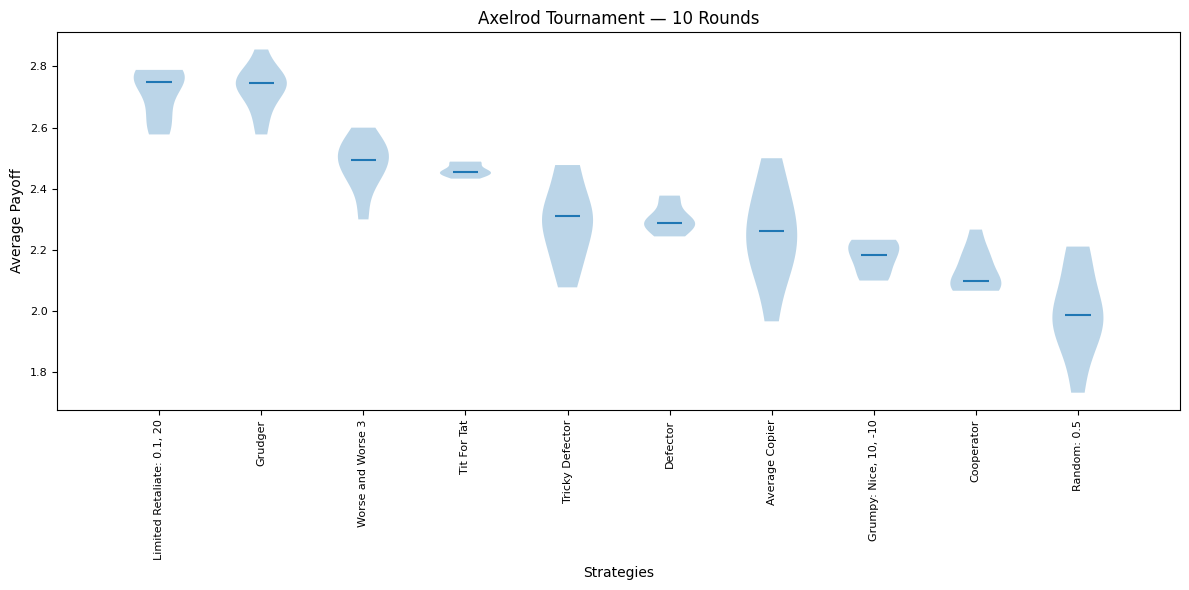

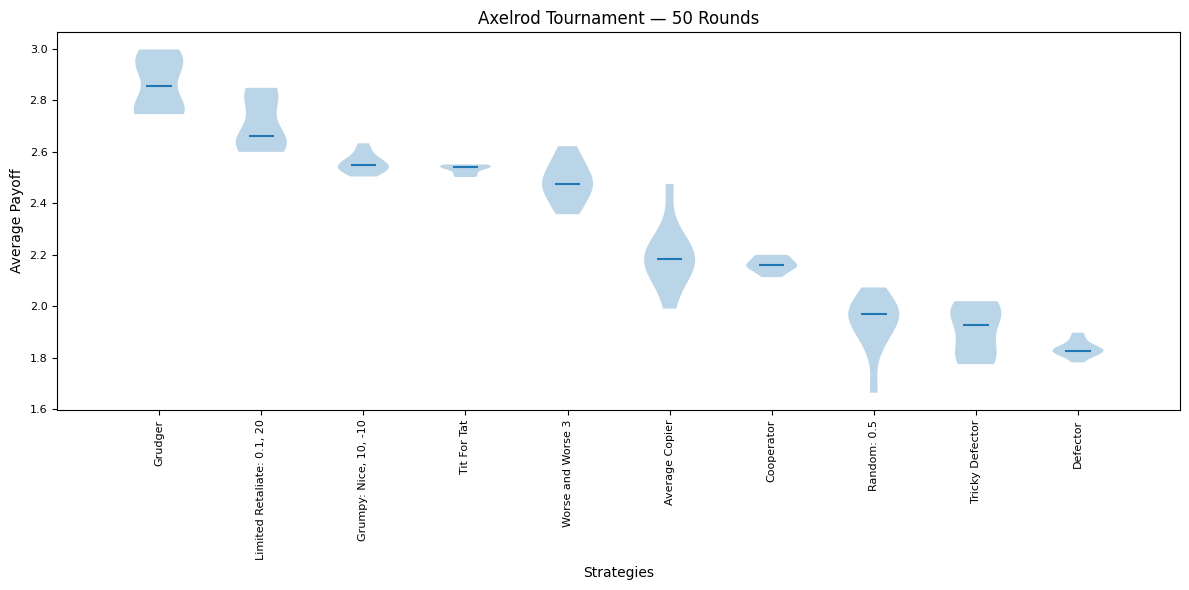

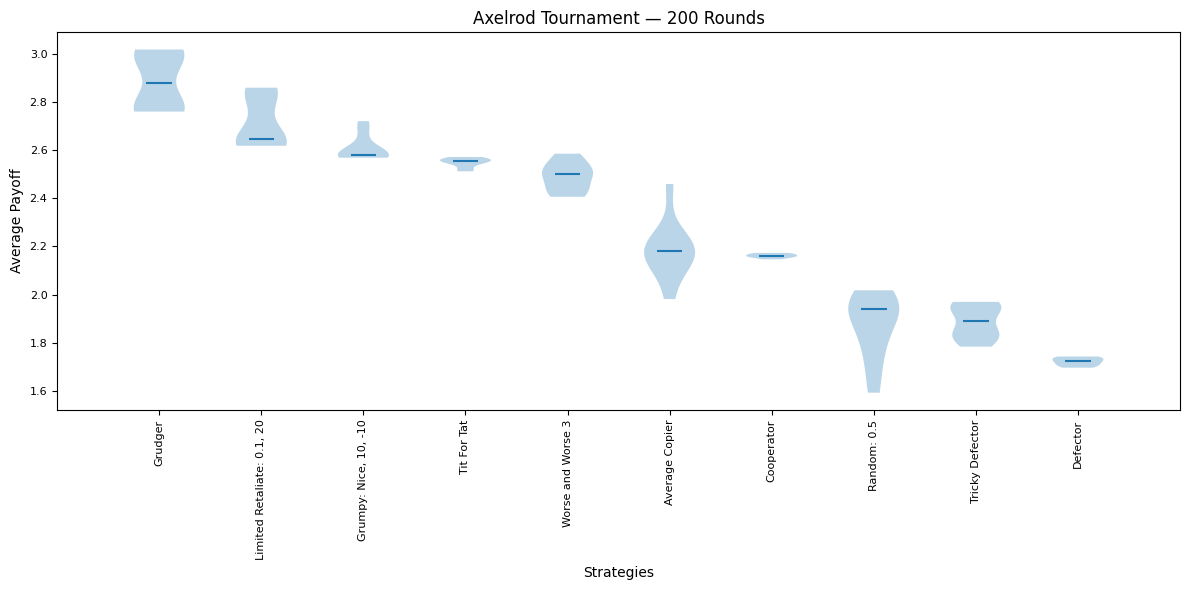

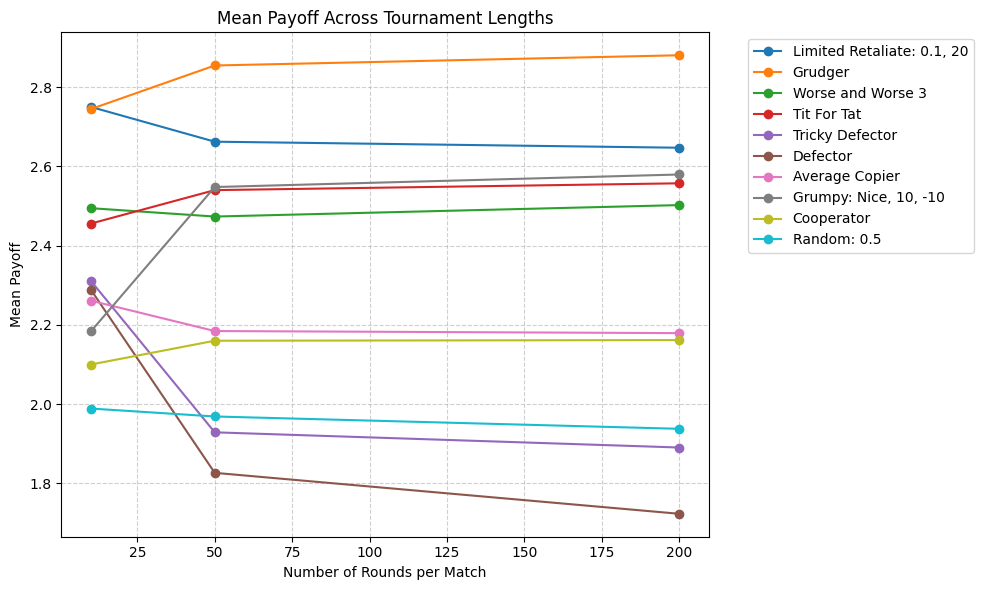

/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/3380965158.py:79: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_200.show()


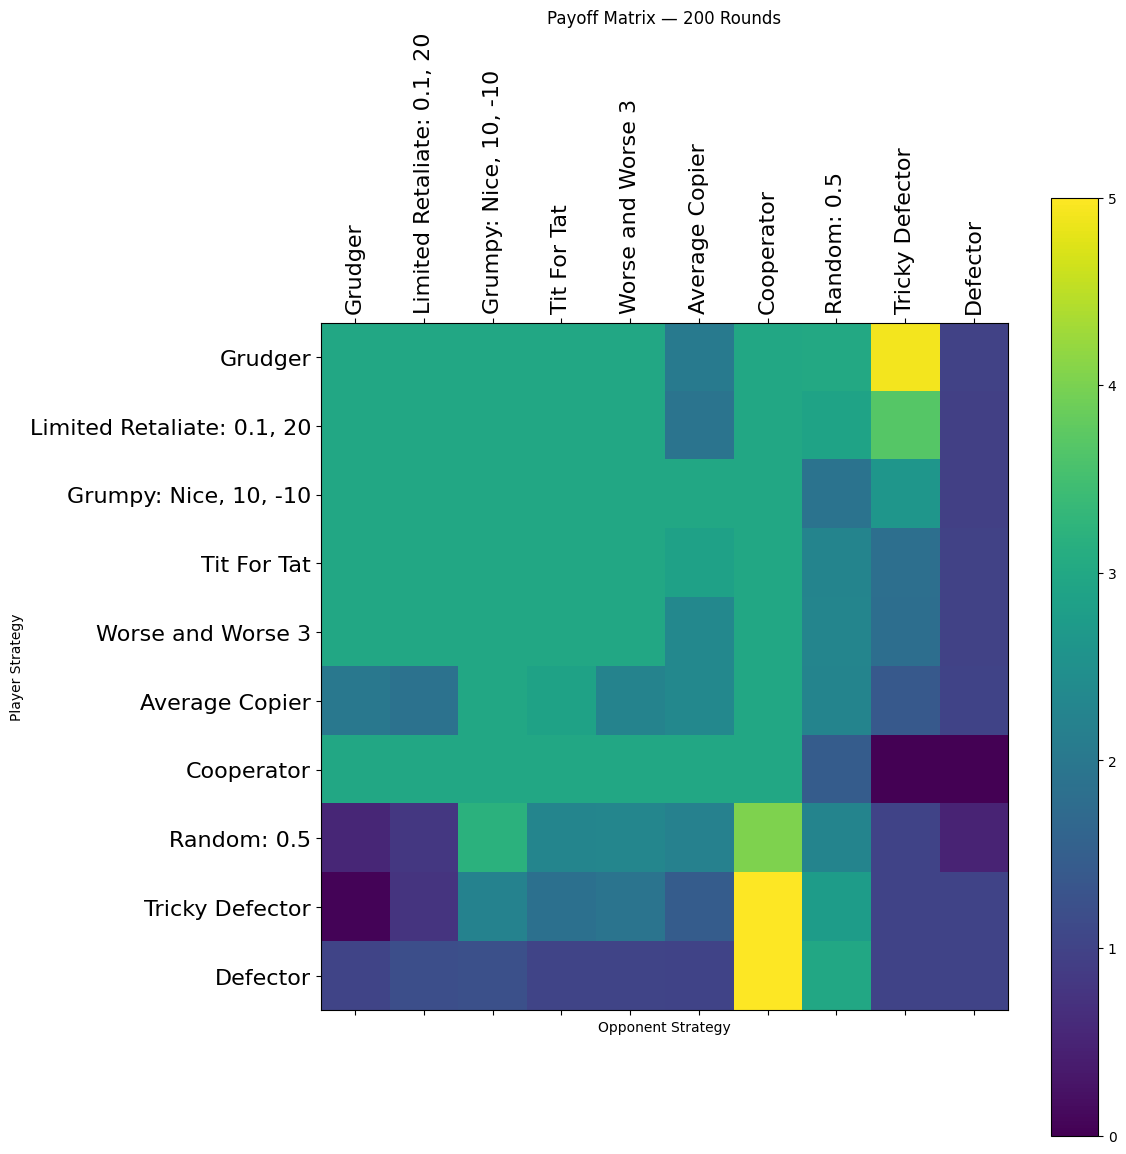

In [ ]:
#Tournament Simulation 
import pandas as pd
import matplotlib.pyplot as plt

# Define the 10 strategies
players = [
    axl.Cooperator(),            # Always cooperate
    axl.Defector(),              # Always defect
    axl.TitForTat(),             # Cooperate, then mimic opponent
    axl.Grudger(),               # Cooperate until opponent defects once, then always defect
    axl.Grumpy(),                # Gets grumpy after repeated defections
    axl.LimitedRetaliate(),      # Punish opponent for 5 rounds after defection
    axl.AverageCopier(),         # Cooperate with probability equal to opponent’s cooperation rate
    axl.WorseAndWorse3(),        # Becomes increasingly likely to defect as opponent defects
    axl.TrickyDefector(),        # Defects initially, then tries to trick opponent into cooperating
    axl.Random()                 # Randomly cooperates or defects
]

# Run tournaments for different round lengths
rounds_list = [10, 50, 200]
results_dict = {}
summary_table = []
all_results = []  # store full data for combined plot later

for turns in rounds_list:
    tournament = axl.Tournament(players, turns=turns, seed=42)
    results = tournament.play(progress_bar=False)
    results_dict[turns] = results

    summary = results.summarise()
    for rank, name, mean_score, *rest in summary:
        all_results.append({"Rounds": turns, "Strategy": name, "Mean Score": mean_score})

    # Extract top-ranked strategy
    rank, name, mean_score, *rest = summary[0]
    summary_table.append({"Rounds": turns, "Dominant Strategy": name, "Mean Score": mean_score})

# Display summary table
df = pd.DataFrame(summary_table)
display(df)

# --- Plot results (individual tournaments) ---
for turns, results in results_dict.items():
    plot = axl.Plot(results)
    _, ax = plt.subplots(figsize=(8, 4))
    ax.set_title(f"Axelrod Tournament — {turns} Rounds")
    ax.set_xlabel("Strategies")
    ax.set_ylabel("Average Payoff")

    plot.boxplot(ax=ax)
    plt.tight_layout()
    plt.show()

# --- Combined summary plot across all tournaments ---
combined_df = pd.DataFrame(all_results)

plt.figure(figsize=(10, 6))
for strategy in combined_df["Strategy"].unique():
    subset = combined_df[combined_df["Strategy"] == strategy]
    plt.plot(subset["Rounds"], subset["Mean Score"], marker="o", label=strategy)

plt.title("Mean Payoff Across Tournament Lengths")
plt.xlabel("Number of Rounds per Match")
plt.ylabel("Mean Payoff")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Payoff matrix plot for the 200-round tournament ---
results_200 = results_dict[200]
plot_200 = axl.Plot(results_200)
_, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Payoff Matrix — 200 Rounds")
ax.set_xlabel("Opponent Strategy")
ax.set_ylabel("Player Strategy")

p_200 = plot_200.payoff(ax=ax)
p_200.show()

This tournament reveals a number of insights regarding the success of different strategies and the value of cooperation. By testing different round lengths, we can see that some strategies perform better in short-term games than in longer-term ones: for example, the Defector strategy outperforms four other strategies in 10 round games, but loses against all other strategies in 200 round games. 

We can again see that the highest average scores are for players who implement a strategy such as Defector or Tricky Defector against players who always Cooperate (and do not punish defection). However, players who choose a Defector strategy against players who also do so, or who punish for defection, end up with some of the lowest average scores. 

We can also observe that strategies that cooperate with each other, but also punish defection, are in the higher end of the mean scores. The 'Grudger' strategy most likely ends up being the winner over longer rounds because many of the other strategies are 'Nice' (ie., they start by cooperating and then punish defection) - meaning that the cooperation is sustained over time and leads to a higher final score in the end.

### Reinforcement Learning

What happens if we introduce strategies that use reinforcement learning, trained via Neural Nets?

Let's test in a further simulation of a 200 round tournament, introducing a new strategy:

- Evolved ANN
    - A strategy based on a pre-trained neural network with 17 features and a hidden layer of size 10. Trained using the axelrod_dojo version: 0.0.8 Training data is archived at doi.org/10.5281/zenodo.1306926

In [229]:
# Define the 10 strategies
players = [
    axl.Cooperator(),            # Always cooperate
    axl.Defector(),              # Always defect
    axl.TitForTat(),             # Cooperate, then mimic opponent
    axl.Grudger(),               # Cooperate until opponent defects once, then always defect
    axl.Grumpy(),                # Gets grumpy after repeated defections
    axl.LimitedRetaliate(),      # Punish opponent for 5 rounds after defection
    axl.AverageCopier(),         # Cooperate with probability equal to opponent’s cooperation rate
    axl.WorseAndWorse3(),        # Becomes increasingly likely to defect as opponent defects
    axl.TrickyDefector(),        # Defects initially, then tries to trick opponent into cooperating
    axl.Random(),                 # Randomly cooperates or defects
    axl.EvolvedANNNoise05()             # Uses a neural network evolved to play PD
]

# Run the tournament for 200 rounds
tournament_200 = axl.Tournament(players, turns=500, seed=1)
results_200 = tournament_200.play(progress_bar=False)

#Results
results_200.ranked_names


['Grudger',
 'Evolved ANN 5 Noise 05',
 'Limited Retaliate: 0.1, 20',
 'Tit For Tat',
 'Worse and Worse 3',
 'Grumpy: Nice, 10, -10',
 'Average Copier',
 'Cooperator',
 'Random: 0.5',
 'Tricky Defector',
 'Defector']

We see here that the Evolved Ann strategy, on average, outperforms all other strategies - except for the Grudger strategy. It is important to note that these results, as well as the results in the previous tournament simulation, depend on the mix of strategies that are played.
This means that a strategy such as Grudger may perform differently when facing a different mix of opponents, since its success depends on the frequency of cooperative versus exploitative behaviors in the environment.

## A Bayesian Signaling Game Setup
#### The game theory behind ['A House of Dynamite'](https://www.rottentomatoes.com/m/a_house_of_dynamite) from director Kathryn Bigelow

A single, unattributed intercontinental ballistic missile is launched toward the United States. In the span of 18 minutes, from the first detection of a launch to impact, the President and the national defense apparatus must decide how to respond to the incoming ICBM whose origin and intent are uncertain. An instance of incomplete, asymmetric information with catastrophic payoffs.

This premise is represntative of a ['Bayesian signlaing game'](https://www.youtube.com/watch?v=Bz4-APpbtQw), where one actor has private information and communicates - possibly deceptively - with another actor who must decide how to respond.

### The Setup

**Two Players & Nature**
- **The Sender (adversary)**: Launches the ICBM. Identity/intentions unknown to the the Receiver. May be *one* of two types: 1. an **Agressor** who has genuinly launched an attack, or 2. an **Innocent** who has not. This actor can elect a signal to transmit to the Receiver, ie. "we didn't launch" or no communication at all (radio silence).
- **The Receiver (responder)**: Know's an incoming ICBM is detected, but does not know whether it was launched intentionally or accidentally/its a false alarm. Observes the signal from the Sender and must evaluate its authenticity, determine a response with incomplete information and can only infer the Sender's type from observable signals and a prior belief about the Sender which it updates with information collected from the signals received (**Baye's Theorem**).
    - $p=Pr(Aggressor)$: the prior
    - $Pr(s|A)$ and $Pr(s|I)$: probabilities of seeing signal $s$ given each type
    - New probability that the Sender is an aggressor after observinf a signal $s$ is $Pr(\text{Aggressor} \mid s) = \frac{\Pr(s \mid \text{Aggressor}) \, p} {\Pr(s \mid \text{Aggressor}) \, p + \Pr(s \mid \text{Innocent}) \, (1 - p)}$
- **Nature**: Sets the game in play, determining the state of the world by determining the Sender's type, ie. "Is there really a hostile attack or not?". With probability $p$, selects the **Agressor** type (ex. there is an incoming ICBM and it was launched intentionally by the Sender); with probability $1-p$, selects the **Innocent** type (ex. accidental launch, false radar return, etc.).

### Decision Stage and Payoffs

After Nature determines the Sender’s type and the Sender chooses a signal, the Receiver must act. This stage encapsolates crisis management under uncertainty. The Receiver must respond to ambiguous information when both action and inaction carry risks. In the case of *'A House of Dynamite'*, the risks are catastrophic.

#### Receiver’s Actions
The Receiver observes only the signal $s$ and must decide between two actions:

1. **Retaliate (R)** — launch a counterstrike before impact.  
2. **Wait (W)** — delay action to gather more information, risking that the attack is genuine.

The Receiver’s goal is to *maximize their expected utility*, given the *posterior belief* $\Pr(\text{Aggressor} \mid s)$. A rational Receiver will retaliate only if the expected payoff of doing so exceeds that of waiting:

$\text{E}[u_{\text{US}}(R)\mid s] > \text{E}[u_{\text{US}}(W)\mid s]$

This defines a **belief threshold** $\tau$ such that the Receiver retaliates whenever $\Pr(\text{Aggressor}\mid s) > \tau$.

### Sender’s Signals and Incentives
The Sender, knowing its true type, chooses a signal strategically to influence the Receiver’s belief and thus its action:

- An **Aggressor** might attempt to mask agression by mimicking a peaceful signal or feigning ignorance to delay retaliation.  
- An **Innocent** type wants to signal innocence credibly to avoid a wrongful counterstrike.  

Both types may find it profitable to send the same message — leading to **pooling**, where communication breaks down.


### Payoff Structure
To analyze outcomes, we assign payoffs reflecting the strategic costs and benefits of each action–type combination.

| Sender True Type | Receiver Action | Receiver Payoff | Sender Payoff | Interpretation |
|------------|----------------|--------------|----------------|----------------|
| Aggressor  | Retaliate (R) | **+10** | **−10** | Successful deterrence; aggressor punished |
| Aggressor  | Wait (W) | **−20** | **+5** | Failed defense; aggressor succeeds |
| Innocent   | Retaliate (R) | **−15** | **−8** | Wrongful retaliation; catastrophic misinterpretation |
| Innocent   | Wait (W) | **0** | **+2** | Peace maintained; crisis resolved |

- The Receiver faces a **trade-off** between deterrence and restraint.  
- For the two faces of the Sender, an Aggressor prefers inaction by the Receiver; the Innocent prefers no retaliation.  
- Mutual understanding (Wait when Innocent, Retaliate when Aggressor) is efficient but difficult to achieve because the Receiver cannot observe the Sender’s true type.

### Outcomes and Equilibria
By comparing expected payoffs across different priors \( p \) and signal patterns, the model identifies equilibrium outcomes:

- **Pooling Equilibrium:** Both types send the same signal; the Receiver relies solely on its prior belief \( p \).  
- **Separating Equilibrium:** Each type sends a distinct signal; the Receiver can update beliefs accurately and act accordingly.  
- **Mixed Equilibrium:** Each type randomizes signals; the Receiver responds probabilistically.

In the context of *'A House of Dynamite'*, these equilibria illustrate how strategic ambiguity, limited time, and asymmetric information can make catastrophic misinterpretation a rational outcome.

In [16]:
# Bayesian Signaling Game — "A House of Dynamite"
# =================================================
# This notebook models a Bayesian signaling game under nuclear launch uncertainty.
# The receiver must decide whether to retaliate or wait, given ambiguous signals
# from an adversary of unknown type (Aggressor or Innocent).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Define payoffs for both players

US_payoff = {
    ('A', 'R'):  10.0,   # Strong deterrence benefit
    ('A', 'W'): -20.0,   # Major loss from inaction
    ('I', 'R'): -15.0,   # Wrongful retaliation
    ('I', 'W'):   0.0,   # Peace maintained
}

Sender_payoff = {
    ('A', 'R'): -10.0,  # Punished if retaliated against
    ('A', 'W'):   5.0,  # Gains if not punished
    ('I', 'R'):  -8.0,  # Suffers if wrongly attacked
    ('I', 'W'):   2.0,  # Gains from peace
}

# Grid of priors: p = Pr(Aggressor)
p_grid = np.linspace(0, 1, 201)

# Deterministic sender strategies (alpha, beta)
# alpha = Pr(s1 | Aggressor), beta = Pr(s1 | Innocent)
sender_strategies = [
    (1, 0, "Separating (A→s1, I→s2)"),
    (0, 1, "Reverse-separating (A→s2, I→s1)"),
    (1, 1, "Pooling on s1"),
    (0, 0, "Pooling on s2"),
]

In [18]:
def posterior(p, alpha, beta, signal):
    """Compute posterior Pr(A | signal)."""
    if signal == 's1':
        num, den = alpha*p, alpha*p + beta*(1-p)
    else:
        num, den = (1-alpha)*p, (1-alpha)*p + (1-beta)*(1-p)
    return np.nan if den == 0 else num/den

def receiver_best_response(p_belief):
    """Return best action (R/W) and expected payoffs for US."""
    EU_R = p_belief*US_payoff[('A','R')] + (1-p_belief)*US_payoff[('I','R')]
    EU_W = p_belief*US_payoff[('A','W')] + (1-p_belief)*US_payoff[('I','W')]
    return ('R' if EU_R > EU_W else 'W', EU_R, EU_W)

def sender_best_response_for_type(t, act_s1, act_s2):
    """Sender type t chooses best signal given receiver actions."""
    u_s1, u_s2 = Sender_payoff[(t, act_s1)], Sender_payoff[(t, act_s2)]
    if u_s1 > u_s2: return 's1'
    if u_s2 > u_s1: return 's2'
    return {'s1', 's2'}  # indifferent

def is_equilibrium(p, alpha, beta, actions):
    """Check sender has no profitable deviation."""
    intended_A = 's1' if alpha == 1 else 's2'
    intended_I = 's1' if beta == 1 else 's2'
    br_A = sender_best_response_for_type('A', actions['s1'], actions['s2'])
    br_I = sender_best_response_for_type('I', actions['s1'], actions['s2'])
    def ok(intended, br): return True if isinstance(br,set) else br == intended
    return ok(intended_A, br_A) and ok(intended_I, br_I)

In [19]:
records = []

for p in p_grid:
    for alpha, beta, label in sender_strategies:
        # Posterior beliefs for each signal
        p_s1, p_s2 = posterior(p, alpha, beta, 's1'), posterior(p, alpha, beta, 's2')
        belief_s1, belief_s2 = (p if np.isnan(p_s1) else p_s1), (p if np.isnan(p_s2) else p_s2)

        act_s1, EU_R1, EU_W1 = receiver_best_response(belief_s1)
        act_s2, EU_R2, EU_W2 = receiver_best_response(belief_s2)
        actions = {'s1': act_s1, 's2': act_s2}

        if is_equilibrium(p, alpha, beta, actions):
            records.append({
                'p': p, 'alpha': alpha, 'beta': beta,
                'sender_strategy': label,
                'belief_s1': belief_s1, 'belief_s2': belief_s2,
                'US_action_s1': act_s1, 'US_action_s2': act_s2
            })

eq_df = pd.DataFrame(records)
eq_df.head()

,p,alpha,beta,sender_strategy,belief_s1,belief_s2,US_action_s1,US_action_s2
0,0.000,1,0,"Separating (A→s1, I→s2)",0.000,0.000,W,W
1,0.000,0,1,"Reverse-separating (A→s2, I→s1)",0.000,0.000,W,W
2,0.000,1,1,Pooling on s1,0.000,0.000,W,W
3,0.000,0,0,Pooling on s2,0.000,0.000,W,W
4,0.005,1,1,Pooling on s1,0.005,0.005,W,W


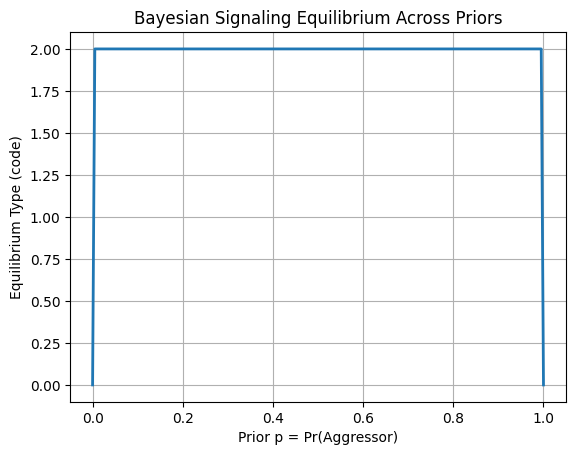

In [20]:
eq_map = {
    "Separating (A→s1, I→s2)": 0,
    "Reverse-separating (A→s2, I→s1)": 1,
    "Pooling on s1": 2,
    "Pooling on s2": 3,
}

first_eq = eq_df.groupby('p').first().reset_index()
first_eq['eq_code'] = first_eq['sender_strategy'].map(eq_map)

plt.figure()
plt.plot(first_eq['p'], first_eq['eq_code'], linewidth=2)
plt.xlabel("Prior p = Pr(Aggressor)")
plt.ylabel("Equilibrium Type (code)")
plt.title("Bayesian Signaling Equilibrium Across Priors")
plt.grid(True)
plt.show()

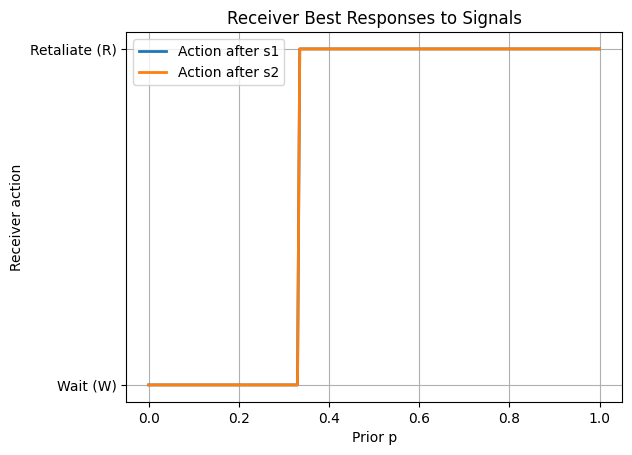

In [21]:
act_map = {'W': 0, 'R': 1}
act_df = first_eq.copy()
act_df['a_s1'] = act_df['US_action_s1'].map(act_map)
act_df['a_s2'] = act_df['US_action_s2'].map(act_map)

plt.figure()
plt.plot(act_df['p'], act_df['a_s1'], label="Action after s1", linewidth=2)
plt.plot(act_df['p'], act_df['a_s2'], label="Action after s2", linewidth=2)
plt.yticks([0,1], ["Wait (W)", "Retaliate (R)"])
plt.xlabel("Prior p")
plt.ylabel("Receiver action")
plt.title("Receiver Best Responses to Signals")
plt.legend()
plt.grid(True)
plt.show()

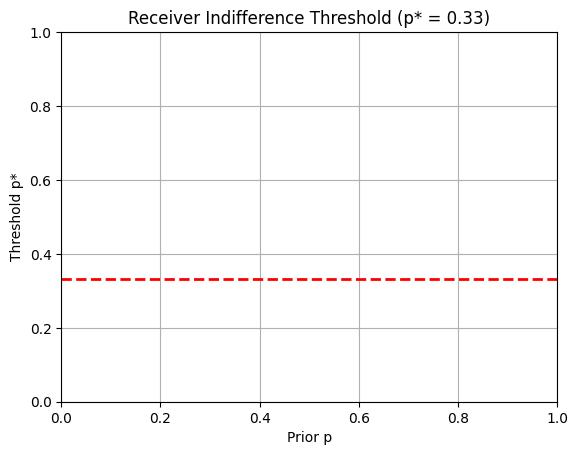

In [22]:
num = (US_payoff[('I','W')] - US_payoff[('I','R')])
den = (US_payoff[('A','R')] - US_payoff[('A','W')]) + num
p_star = num / den if den != 0 else np.nan

plt.figure()
plt.axhline(p_star, color='r', linestyle='--', linewidth=2)
plt.ylim(0,1)
plt.xlabel("Prior p")
plt.ylabel("Threshold p*")
plt.title(f"Receiver Indifference Threshold (p* = {p_star:.2f})")
plt.grid(True)
plt.show()

Audience Cost